# Coursera final Project #
## The battle of neighborhoods ##

#### Exploring the data of neighborhoods in  Toronto using web scraping 

In [ ]:
import numpy as np
import pandas as pd
import json

In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
website_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

soup = BeautifulSoup(website_url,'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XjZKKgpAAEMAAJLAJZoAAAGS","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":935851093,"wgRevisionId":935851093,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communi

#### Converting into the pandas dataframe and clean it as per requirement

In [5]:
dataframe = pd.read_html(str(soup))[0]
dataframe.columns=dataframe.iloc[0]
dataframe=dataframe.drop(dataframe.index[0])
dataframe.head()

,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


In [6]:
dataframe = dataframe.loc[dataframe["Borough"] != "Not assigned"]
dataframe.head()

,Postcode,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor


In [7]:
dataframe = dataframe.groupby(["Postcode","Borough"])["Neighbourhood"].apply(list)
dataframe = dataframe.sample(frac=1).reset_index()
dataframe["Neighbourhood"]=dataframe["Neighbourhood"].str.join(", ")
dataframe.head()

,Postcode,Borough,Neighbourhood
0,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
1,M4P,Central Toronto,Davisville North
2,M5R,Central Toronto,"The Annex, North Midtown, Yorkville"
3,M6J,West Toronto,"Little Portugal, Trinity"
4,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village"


In [8]:
print('The dataframe has {} boroughs and {} neighbourhood.'.format(
        len(dataframe['Borough'].unique()),
        dataframe.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighbourhood.


#### extracting the population data to explore population in different neighborhoods

In [9]:
toronto_population_ng=pd.read_csv("Population_Toronto.csv")

In [10]:
toronto_population_ng.head()

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999",...,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,...,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,...,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,...,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,...,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,...,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [11]:
toronto_population=toronto_population_ng.rename(columns={'PostalCode':'Postcode'})
toronto_population.head()

,Postcode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999",...,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,...,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,...,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,...,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,...,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,...,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [12]:
geo_data=pd.read_csv("http://cocl.us/Geospatial_data",header=0)
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
toronto_df=dataframe.merge(geo_data,left_on="Postcode",right_on="Postal Code")
toronto_df.head()

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",M1M,43.716316,-79.239476
1,M4P,Central Toronto,Davisville North,M4P,43.712751,-79.390197
2,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",M5R,43.672710,-79.405678
3,M6J,West Toronto,"Little Portugal, Trinity",M6J,43.647927,-79.419750
4,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",M6K,43.636847,-79.428191


In [15]:
toronto_df=toronto_df.drop("Postal Code",axis =1)

In [16]:
toronto_df=toronto_df[toronto_df["Borough"].str.contains("Toronto")]

In [17]:
toronto_neighborhood=toronto_df.reset_index(drop=True)
toronto_neighborhood.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4P,Central Toronto,Davisville North,43.712751,-79.390197
1,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
2,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
3,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191
4,M6G,Downtown Toronto,Christie,43.669542,-79.422564


In [18]:
toronto_pop_ng=pd.merge(toronto_neighborhood,toronto_population,on="Postcode")
toronto_pop_ng.head()

,Postcode,Borough_x,Neighbourhood,Latitude,Longitude,Borough_y,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,...,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M4P,Central Toronto,Davisville North,43.712751,-79.390197,Central Toronto,203,46433,27380,4.45,...,5.50,3.40,2.99,2.45,0.87,0.34,2.63,1.97,0.84,70.91
1,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Central Toronto,95,30526,10863,2.81,...,7.03,3.06,1.15,1.33,0.98,0.62,1.11,1.98,0.84,70.04
2,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,West Toronto,165,32115,22429,2.94,...,14.35,3.02,1.04,2.04,0.37,1.55,0.43,0.78,0.63,69.14
3,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,West Toronto,199,29834,14280,3.98,...,2.65,10.05,4.51,2.12,0.63,1.78,0.68,0.55,0.20,62.32
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,East Toronto,63,21567,6058,3.56,...,2.85,1.60,1.07,1.00,0.42,0.74,0.26,0.53,0.51,85.62


#### Targeting the food places, joints and hangout places

In [19]:
toronto_pop_ng.head()
toronto_pop_df=toronto_pop_ng[["Postcode","Borough_x","Neighbourhood","Latitude","Longitude","Population, 2016",\
                             "Population density per square kilometre","South Asian","Chinese","Black","Arab",\
                             "Southeast Asian","West Asian"]]


In [57]:
toronto_pop_df.head()


,Postcode,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Chinese,Black,Arab,Southeast Asian,West Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants
0,M4P,Central Toronto,Davisville North,43.712751,-79.390197,46433,27380,5.22,5.50,3.40,0.87,0.34,2.63,5.0,46,1,3
1,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,30526,10863,3.69,7.03,3.06,0.98,0.62,1.11,6.0,20,0,0
2,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,32115,22429,2.28,14.35,3.02,0.37,1.55,0.43,1.0,6,0,0
3,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,29834,14280,5.88,2.65,10.05,0.63,1.78,0.68,2.0,4,0,0
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,21567,6058,2.99,2.85,1.60,0.42,0.74,0.26,3.0,2,0,0


#### Use geopy library to get the latitude and longitude of toronto neighborhood

In [21]:
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
print("Libraries imported")

Libraries imported


In [22]:
address = 'Canada,toronto'

geolocator = Nominatim(user_agent="canada_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 43.653963, -79.387207.


In [24]:
map_toronto=folium.Map(location=[latitude,longitude],zoom_start=10)
for lat, lng, borough, neighbourhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

#### Define FoursSquare credentials and version to explore different venues in neighborhoods

In [23]:
CLIENT_ID = 'GYMFJZLPXFWQ1DMTRZDNYF2ENYIWGX4LRJH02OBSLHEVKPGM'
CLIENT_SECRET = 'KWTXVRYM4SWZ3B212BHECCJJDICBKYU3EAUNSXH3R4L1MJ2L'
VERSION = '20180605'
LIMIT=100
radius=1000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GYMFJZLPXFWQ1DMTRZDNYF2ENYIWGX4LRJH02OBSLHEVKPGM
CLIENT_SECRET:KWTXVRYM4SWZ3B212BHECCJJDICBKYU3EAUNSXH3R4L1MJ2L


In [25]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venues_list in venues_list for item in venues_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue ID'          
                            ]
    
    return(nearby_venues)

In [26]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighbourhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

Davisville North
The Annex, North Midtown, Yorkville
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
Christie
Rosedale
The Beaches
Harbourfront East, Toronto Islands, Union Station
Queen's Park
Berczy Park
Harbord, University of Toronto
The Danforth West, Riverdale
St. James Town
High Park, The Junction South
Lawrence Park
Chinatown, Grange Park, Kensington Market
Davisville
Dovercourt Village, Dufferin
Runnymede, Swansea
Church and Wellesley
Design Exchange, Toronto Dominion Centre
Business Reply Mail Processing Centre 969 Eastern
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Forest Hill North, Forest Hill West
Stn A PO Boxes 25 The Esplanade
Commerce Court, Victoria Hotel
First Canadian Place, Underground city
Ryerson, Garden District
North Toronto West
Roselawn
The Beaches West, India Bazaar
Central Bay Street
Studio District
Adelaide, King, Richmond
Moore Park, Summerhill East
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King

In [27]:
toronto_venues.shape

(1698, 8)

In [28]:
uniques = toronto_venues['Venue Category'].unique()

In [29]:
uniques

array(['Park', 'Food & Drink Shop', 'Breakfast Spot', 'Department Store',
       'Hotel', 'Sandwich Place', 'Gym', 'Indian Restaurant', 'Café',
       'Middle Eastern Restaurant', 'American Restaurant',
       'Vegetarian / Vegan Restaurant', 'BBQ Joint', 'Coffee Shop',
       'Burger Joint', 'Pub', 'History Museum', 'Liquor Store',
       'Pharmacy', 'Pizza Place', 'Cosmetics Shop', 'Cheese Shop',
       'Flower Shop', 'Brewery', 'Korean Restaurant', 'Asian Restaurant',
       'Greek Restaurant', 'Cuban Restaurant', 'Ice Cream Shop', 'Bar',
       'Wine Bar', 'Art Gallery', 'Vietnamese Restaurant',
       'New American Restaurant', 'Cocktail Bar', 'French Restaurant',
       'Record Shop', 'Yoga Studio', 'Theater', 'Beer Store',
       'Japanese Restaurant', 'Portuguese Restaurant', 'Bakery',
       'Italian Restaurant', 'Boutique', 'Bistro', "Men's Store",
       'Music Venue', 'Restaurant', 'Deli / Bodega', 'Cupcake Shop',
       'Miscellaneous Shop', 'Gift Shop', 'Mexican Restauran

In [30]:
import re
uniqueList = uniques.tolist()

len(uniqueList)

225

#### Exploring the venues for targeting food places and hangout places

In [31]:
targets = ['Restaurant', 'Joint', 'Place', 'Theater', 'Music', 'Club', 'club', 'Cocktail', 'cocktail', 'Roof', \
           'Café', 'Lounge', 'Pub', 'pub', 'House','Cafe','Wine','Food'\
          'Nightlife', 'Party']

matching = [s for s in uniqueList if any(xs in s for xs in targets)]
len(matching)

73

In [32]:
mask = toronto_venues['Venue Category'].isin(matching)
Places_food = toronto_venues[mask]
Places_food.reset_index(inplace = True)
Places_food.drop('index', axis = 1, inplace = True)
Places_food.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(728, 8)

In [33]:
Places_food .head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,Davisville North,43.712751,-79.390197,Subway,43.708474,-79.390674,Sandwich Place,4b0b3691f964a520c62e23e3
1,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant,4c62c59ce1621b8dd0332453
2,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Ezra's Pound,43.675153,-79.405858,Café,4ae7bc29f964a52084ad21e3
3,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Fet Zun,43.675147,-79.406346,Middle Eastern Restaurant,5c5f10e4bf7dde002cef8172
4,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Rose & Sons,43.675668,-79.403617,American Restaurant,50abfac3e4b05922967ebe89


In [34]:
hangout_places = ['Restaurant','joints','Place','Joint','Cafe','cafe','Café','Theater','House']
matching = [s for s in uniqueList if any(xs in s for xs in hangout_places)]
mealMask = Places_food['Venue Category'].isin(matching)
nightMask = ~mealMask
eats = Places_food[mealMask]
Places_ho = Places_food[nightMask]
Places_ho.reset_index(inplace = True)
Places_ho.shape

(98, 9)

In [153]:
Places_ho.head()

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,8,"Adelaide, King, Richmond",43.650571,-79.384568,Lobby Lounge at the Shangri-La Toronto,43.649155,-79.386546,Lounge,53856fa411d2061fc84a3d0a
1,15,"Adelaide, King, Richmond",43.650571,-79.384568,King Taps,43.648476,-79.382058,Gastropub,59603f86112c6c70931c9401
2,18,"Adelaide, King, Richmond",43.650571,-79.384568,Reds Wine Tavern,43.649570,-79.382129,Gastropub,4ad4c05df964a52026f620e3
3,24,"Adelaide, King, Richmond",43.650571,-79.384568,The Rex Hotel Jazz & Blues Bar,43.650505,-79.388577,Jazz Club,4b68aed1f964a520de862be3
4,41,"Adelaide, King, Richmond",43.650571,-79.384568,The National Club,43.649343,-79.380574,Wine Bar,4ae8c1d8f964a52005b221e3


In [35]:
def getDetails(name, VENUE_ID):
    
    nightVenues=[]
    for name, VENUE_ID in zip(name, VENUE_ID):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            VENUE_ID,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
                )
            
        # make the GET request
        results = requests.get(url).json()
        
        # return only relevant information for each nearby venue
        nightVenues.append(results)
        
    return(nightVenues)

    #for i in range(len(details))
    #popularTimes = pd.DataFrame([item for popularHours in popularHours for item in popularHours])
    #popularTimes.columns = ['timeframes',        
                            
Places_ho_venues = getDetails(name=Places_ho['Venue'],
                                   VENUE_ID=Places_ho['Venue ID'],
                                  )

Pour House
Paris Paris Bar
Gift Shop
The Garrison
Cinema Nightclub
Dupont Disco
Grover Pub and Grub
Air Canada Club
Delta Toronto Club Lounge
360 Restaurant
Redpath Stage
WestJet Stage
Buddies In Bad Times Theatre
Hart House Music Room
D.W. Alexander
The Reservoir Lounge
Pravda Vodka Bar
CC Lounge
Chroma
The Gallery
East of Brunswick
Comfort Zone
The Auld Spot Pub
Pearl Diver
Beerbistro
The Reservoir Lounge
D.W. Alexander
The National Club
CC Lounge
Power Up Game Bar
Indie Alehouse
Junction City Music Hall
Grey Gardens
El Rey
Big Trouble
Rehearsal Factory
Bryden's Pub
Henry VIII Ale House
Wickson Social
Churchmouse & Firkin
Hair Of The Dog
Buddies In Bad Times Theatre
Bishop and Belcher
Flash
Walrus Pub & Beer Hall
King Taps
The National Club
Reds Wine Tavern
Beerbistro
Air Canada Club
Lobby Lounge at the Shangri-La Toronto
Fionn MacCool's
Scallywags
The Reservoir Lounge
D.W. Alexander
Pravda Vodka Bar
Beerbistro
Walrus Pub & Beer Hall
CC Lounge
Air Canada Club
The Corner Place
Walrus 

In [93]:
Places_ho_venues

[{'meta': {'code': 200, 'requestId': '5e33482cedbcad001bf274ea'},
  'response': {'venue': {'id': '5b6c842bc36588002c80a934',
    'name': 'Cafe Landwer',
    'contact': {'phone': '6477481165',
     'formattedPhone': '(647) 748-1165',
     'twitter': 'cafelandwer',
     'instagram': 'cafelandwer',
     'facebook': '181402975638369',
     'facebookUsername': 'CafeLandwerTO',
     'facebookName': 'Cafe Landwer'},
    'location': {'address': '165 University Ave',
     'crossStreet': 'Adelaide St W',
     'lat': 43.64875349932059,
     'lng': -79.3853673607289,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.64875349932059,
       'lng': -79.3853673607289}],
     'postalCode': 'M5H 3B8',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['165 University Ave (Adelaide St W)',
      'Toronto ON M5H 3B8',
      'Canada']},
    'canonicalUrl': 'https://foursquare.com/v/cafe-landwer/5b6c842bc36588002c80a934',
    'categor

In [37]:
# Trying to find out like and tips also but unable to extract the information
len(Places_ho), len(Places_food)

(98, 728)

In [38]:
Places_ho_counts = Places_ho.groupby(['Neighborhood'], as_index = False).count()

In [39]:
Places_ho_counts

,Neighborhood,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,"Adelaide, King, Richmond",5,5,5,5,5,5,5,5
1,Berczy Park,6,6,6,6,6,6,6,6
2,"Brockton, Exhibition Place, Parkdale Village",1,1,1,1,1,1,1,1
3,"CN Tower, Bathurst Quay, Island airport, Harbo...",2,2,2,2,2,2,2,2
4,"Cabbagetown, St. James Town",3,3,3,3,3,3,3,3
5,Central Bay Street,2,2,2,2,2,2,2,2
6,"Chinatown, Grange Park, Kensington Market",3,3,3,3,3,3,3,3
7,Christie,1,1,1,1,1,1,1,1
8,Church and Wellesley,6,6,6,6,6,6,6,6
9,"Commerce Court, Victoria Hotel",7,7,7,7,7,7,7,7


In [40]:
Places_food_counts = Places_food.groupby(['Neighborhood'], as_index = False).count()

In [41]:
Places_food_counts.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,"Adelaide, King, Richmond",46,46,46,46,46,46,46
1,Berczy Park,20,20,20,20,20,20,20
2,"Brockton, Exhibition Place, Parkdale Village",6,6,6,6,6,6,6
3,Business Reply Mail Processing Centre 969 Eastern,4,4,4,4,4,4,4
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",2,2,2,2,2,2,2


<BarContainer object of 12 artists>

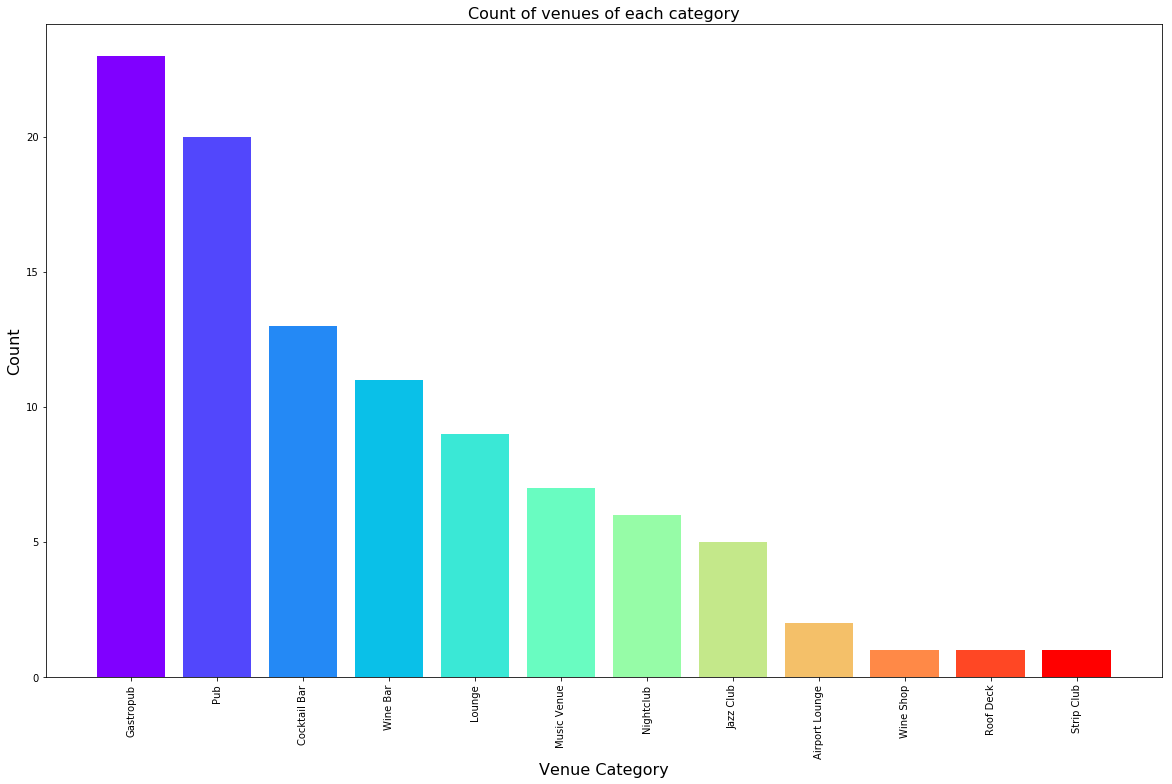

In [136]:
venue_distribution_ho = Places_ho['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution_ho.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue Category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution_ho.index, venue_distribution_ho.values, color = colors)

<BarContainer object of 75 artists>

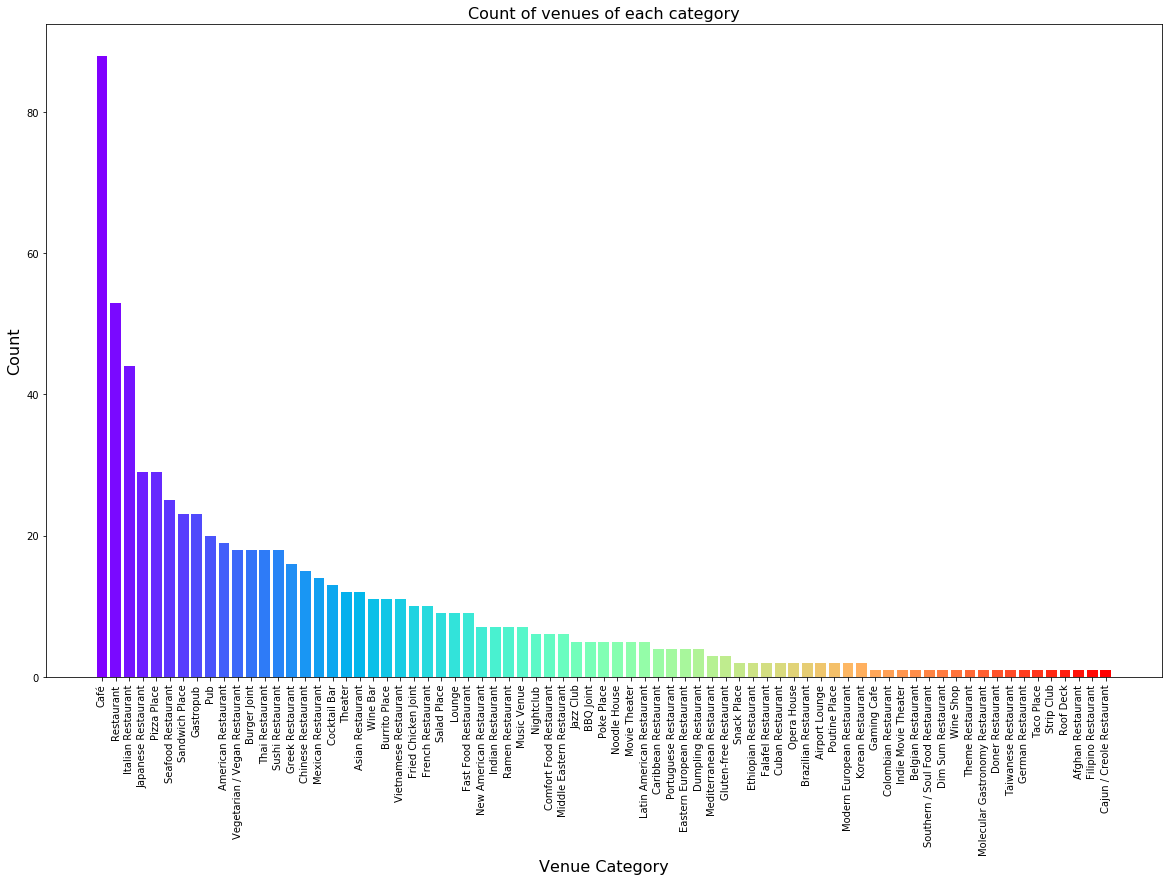

In [137]:
venue_distribution_res = filtered['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution_res.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue Category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution_res.index, venue_distribution_res.values, color = colors)

In [42]:
Places_food.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,Davisville North,43.712751,-79.390197,Subway,43.708474,-79.390674,Sandwich Place,4b0b3691f964a520c62e23e3
1,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant,4c62c59ce1621b8dd0332453
2,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Ezra's Pound,43.675153,-79.405858,Café,4ae7bc29f964a52084ad21e3
3,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Fet Zun,43.675147,-79.406346,Middle Eastern Restaurant,5c5f10e4bf7dde002cef8172
4,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Rose & Sons,43.675668,-79.403617,American Restaurant,50abfac3e4b05922967ebe89


In [43]:
Places_food.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
Neighborhood,,,,,,,
"Adelaide, King, Richmond",46,46,46,46,46,46,46
Berczy Park,20,20,20,20,20,20,20
"Brockton, Exhibition Place, Parkdale Village",6,6,6,6,6,6,6
Business Reply Mail Processing Centre 969 Eastern,4,4,4,4,4,4,4
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",2,2,2,2,2,2,2
"Cabbagetown, St. James Town",19,19,19,19,19,19,19
Central Bay Street,36,36,36,36,36,36,36
"Chinatown, Grange Park, Kensington Market",47,47,47,47,47,47,47
Christie,6,6,6,6,6,6,6


In [44]:
# one hot encoding
Places_food_onehot = pd.get_dummies(Places_food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Places_food_onehot['Neighborhood'] = Places_food['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Places_food_onehot.columns[-1]] + list(Places_food_onehot.columns[:-1])
Places_food_onehot = Places_food_onehot[fixed_columns]

Places_food_onehot.columns

Index(['Neighborhood', 'Afghan Restaurant', 'Airport Lounge',
       'American Restaurant', 'Asian Restaurant', 'BBQ Joint',
       'Belgian Restaurant', 'Brazilian Restaurant', 'Burger Joint',
       'Burrito Place', 'Café', 'Cajun / Creole Restaurant',
       'Caribbean Restaurant', 'Chinese Restaurant', 'Cocktail Bar',
       'Colombian Restaurant', 'Comfort Food Restaurant', 'Cuban Restaurant',
       'Dim Sum Restaurant', 'Doner Restaurant', 'Dumpling Restaurant',
       'Eastern European Restaurant', 'Ethiopian Restaurant',
       'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant',
       'French Restaurant', 'Fried Chicken Joint', 'Gaming Cafe', 'Gastropub',
       'German Restaurant', 'Gluten-free Restaurant', 'Greek Restaurant',
       'Indian Restaurant', 'Indie Movie Theater', 'Italian Restaurant',
       'Japanese Restaurant', 'Jazz Club', 'Korean Restaurant',
       'Latin American Restaurant', 'Lounge', 'Mediterranean Restaurant',
       'Mexican Restaura

In [46]:
Places_food_grouped = Places_food_onehot.groupby('Neighborhood').sum().reset_index()
Places_food_grouped.head()

,Neighborhood,Afghan Restaurant,Airport Lounge,American Restaurant,Asian Restaurant,BBQ Joint,Belgian Restaurant,Brazilian Restaurant,Burger Joint,Burrito Place,...,Southern / Soul Food Restaurant,Strip Club,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theater,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,"Adelaide, King, Richmond",0,0,2,3,0,0,1,2,1,...,0,0,2,0,3,1,0,2,0,1
1,Berczy Park,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,"Brockton, Exhibition Place, Parkdale Village",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Business Reply Mail Processing Centre 969 Eastern,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Adding all the relevant data in a single dataframe to explore the indian resturants with population

In [47]:
toronto_pop_df["Hangout places_count"]=Places_ho_counts["Venue"]
toronto_pop_df["Places for food"]=Places_food_counts["Venue"]
toronto_pop_df["Indian Restuarants"]=Places_food_grouped["Indian Restaurant"]
toronto_pop_df["Asian Restuarants"]=Places_food_grouped["Asian Restaurant"]
toronto_pop_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Postcode,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Chinese,Black,Arab,Southeast Asian,West Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants
0,M4P,Central Toronto,Davisville North,43.712751,-79.390197,46433,27380,5.22,5.50,3.40,0.87,0.34,2.63,5.0,46,1,3
1,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,30526,10863,3.69,7.03,3.06,0.98,0.62,1.11,6.0,20,0,0
2,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,32115,22429,2.28,14.35,3.02,0.37,1.55,0.43,1.0,6,0,0
3,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,29834,14280,5.88,2.65,10.05,0.63,1.78,0.68,2.0,4,0,0
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,21567,6058,2.99,2.85,1.60,0.42,0.74,0.26,3.0,2,0,0


In [48]:
toronto_final_food_df=toronto_pop_df.drop(["Chinese","Black","Arab","West Asian","Southeast Asian"],axis=1)

In [49]:
toronto_final_food_df.head(2)

,Postcode,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants
0,M4P,Central Toronto,Davisville North,43.712751,-79.390197,46433,27380,5.22,5.0,46,1,3
1,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,30526,10863,3.69,6.0,20,0,0


In [50]:
toronto_final_food_df=toronto_final_food_df.replace(np.nan,0)
toronto_final_food_df.head()

,Postcode,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants
0,M4P,Central Toronto,Davisville North,43.712751,-79.390197,46433,27380,5.22,5.0,46,1,3
1,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,30526,10863,3.69,6.0,20,0,0
2,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,32115,22429,2.28,1.0,6,0,0
3,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,29834,14280,5.88,2.0,4,0,0
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,21567,6058,2.99,3.0,2,0,0


In [51]:
cluster_toronto_food=toronto_final_food_df[["Indian Restuarants","South Asian"]].astype(float)

In [52]:
cluster_toronto_food

,Indian Restuarants,South Asian
0,1.0,5.22
1,0.0,3.69
2,0.0,2.28
3,0.0,5.88
4,0.0,2.99
5,1.0,6.41
6,1.0,5.19
7,0.0,5.88
8,0.0,8.28
9,1.0,4.78


#### Cluster Neighborhoods of Toronto

In [53]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_toronto_food)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 4, 4, 0, 4, 0, 0, 0, 3, 0])

In [54]:
toronto_final_food_df['Cluster'] = kmeans.labels_

In [55]:
toronto_final_food_df.head(2)

,Postcode,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants,Cluster
0,M4P,Central Toronto,Davisville North,43.712751,-79.390197,46433,27380,5.22,5.0,46,1,3,0
1,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,30526,10863,3.69,6.0,20,0,0,4


In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(toronto_final_food_df['Latitude'], toronto_final_food_df['Longitude'], toronto_final_food_df['Neighbourhood'], toronto_final_food_df['Cluster'],toronto_final_food_df['Population, 2016'],toronto_final_food_df['Places for food'],toronto_final_food_df['Indian Restuarants']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nIndian Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1#

In [269]:
toronto_final_food_df.loc[toronto_final_food_df['Cluster'] == 0, toronto_final_food_df.columns[[1] + list(range(2, toronto_final_food_df.shape[1]))]]

,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants,Cluster
0,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,7727,8134,5.76,5.0,48,1,3,0
2,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,17945,11806,4.24,3.0,8,0,0,0
5,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,14974,9851,5.58,2.0,21,1,0,0
6,Central Toronto,Davisville North,43.712751,-79.390197,46433,27380,5.22,3.0,35,0,0,0
8,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,48217,22824,4.46,7.0,6,0,0,0
9,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,61173,17944,5.88,7.0,40,1,0,0
10,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,29834,14280,5.88,2.0,44,0,1,0
14,Downtown Toronto,"Harbord, University of Toronto",43.662696,-79.400049,7607,5395,5.19,2.0,43,0,1,0
16,West Toronto,"High Park, The Junction South",43.661608,-79.464763,82712,26438,4.78,5.0,48,0,3,0
17,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,20506,14753,6.41,2.0,1,0,0,0


### Cluster 2#

In [270]:
toronto_final_food_df.loc[toronto_final_food_df['Cluster'] == 1, toronto_final_food_df.columns[[1] + list(range(2, toronto_final_food_df.shape[1]))]]

,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants,Cluster
15,Central Toronto,Roselawn,43.711695,-79.416936,33312,1117,41.79,3.0,3,0,0,1


### Cluster 3

In [271]:
toronto_final_food_df.loc[toronto_final_food_df['Cluster'] == 2, toronto_final_food_df.columns[[1] + list(range(2, toronto_final_food_df.shape[1]))]]

,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants,Cluster
1,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,20923,4500,2.89,5.0,19,0,0,2
3,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259,26134,17081,3.71,2.0,4,0,0,2
4,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,13826,9601,2.86,3.0,2,0,0,2
7,Central Toronto,Davisville,43.704324,-79.388790,11817,7162,3.77,1.0,48,0,0,2
12,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,21210,9511,2.95,1.0,1,0,0,2
13,Central Toronto,Lawrence Park,43.728020,-79.388790,29786,11092,2.25,6.0,8,0,0,2
19,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,10070,6333,2.43,1.0,12,0,0,2
20,East Toronto,The Beaches,43.676357,-79.293031,21567,6058,2.99,2.0,32,1,0,2
21,Central Toronto,"Forest Hill North, Forest Hill West",43.696948,-79.411307,23538,12434,1.81,5.0,12,0,0,2
23,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,32115,22429,2.28,8.0,5,0,0,2


### Cluster 4 #

In [272]:
toronto_final_food_df.loc[toronto_final_food_df['Cluster'] == 3, toronto_final_food_df.columns[[1] + list(range(2, toronto_final_food_df.shape[1]))]]

,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants,Cluster
18,Downtown Toronto,Harbourfront,43.65426,-79.360636,76716,25823,17.93,3.0,21,0,0,3


### Cluster 5

In [273]:
toronto_final_food_df.loc[toronto_final_food_df['Cluster'] == 4, toronto_final_food_df.columns[[1] + list(range(2, toronto_final_food_df.shape[1]))]]

,Borough_x,Neighbourhood,Latitude,Longitude,"Population, 2016",Population density per square kilometre,South Asian,Hangout places_count,Places for food,Indian Restuarants,Asian Restuarants,Cluster
11,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,30284,52656,12.38,7.0,20,1,0,4
22,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,21737,6282,9.71,7.0,27,0,3,4
26,Downtown Toronto,St. James Town,43.651494,-79.375418,15818,5273,8.28,1.0,20,0,0,4
27,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,18675,3780,9.26,1.0,38,0,0,4
28,Downtown Toronto,Central Bay Street,43.657952,-79.387383,25797,14097,9.38,1.0,42,1,1,4


# Analysis #

#### In the analysis, if we see there is no indian and asian restaurants in the roselawn and harbourfront neighborhoods and the population of south asian is high in the respective neighborhoods. #####
